<a href="https://colab.research.google.com/github/mauriceschneeberger/ISE/blob/main/data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from IPython.display import Video

In [2]:
!nvidia-smi

Mon Dec 18 14:56:54 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [55]:
import os
print(os.getcwd())

/content


In [4]:
#!pip install kaggle --upgrade --quiet

In [6]:
import os
from getpass import getpass

In [7]:
os.environ['KAGGLE_USERNAME'] = getpass('Enter KAGGLE_USERNAME secret value: ')
os.environ['KAGGLE_KEY'] = getpass('Enter KAGGLE_KEY secret value: ')

Enter KAGGLE_USERNAME secret value: ··········
Enter KAGGLE_KEY secret value: ··········


In [8]:
!mkdir -p /content/files

In [41]:
!cd /content/files

In [ ]:
!kaggle competitions download -c dfl-bundesliga-data-shootout

100% 34.9G/34.9G [31:11<00:00, 23.5MB/s]
100% 34.9G/34.9G [31:11<00:00, 20.0MB/s]


In [39]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | grep clips | head -10

clips/08fd33_2.mp4      21MB  2022-07-29 14:23:09  
clips/08fd33_9.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_9.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_3.mp4      17MB  2022-07-29 14:23:09  
clips/08fd33_6.mp4      19MB  2022-07-29 14:23:09  
clips/08fd33_0.mp4      19MB  2022-07-29 14:23:09  
clips/0a2d9b_5.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_7.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_0.mp4      20MB  2022-07-29 14:23:09  
clips/0a2d9b_7.mp4      19MB  2022-07-29 14:23:09  


In [54]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | \
grep clips | head -20 | \
awk '{print $1}' | \
while read -r line; \
  do kaggle competitions download -c dfl-bundesliga-data-shootout -f $line -p clips --quiet; \
  unzip ${line}.zip -d clips && rm ${line}.zip; \
  done

Archive:  clips/08fd33_2.mp4.zip
  inflating: clips/08fd33_2.mp4      
Archive:  clips/08fd33_9.mp4.zip
  inflating: clips/08fd33_9.mp4      
Archive:  clips/0a2d9b_9.mp4.zip
  inflating: clips/0a2d9b_9.mp4      
Archive:  clips/08fd33_3.mp4.zip
  inflating: clips/08fd33_3.mp4      
Archive:  clips/08fd33_6.mp4.zip
  inflating: clips/08fd33_6.mp4      
Archive:  clips/08fd33_0.mp4.zip
  inflating: clips/08fd33_0.mp4      
Archive:  clips/0a2d9b_5.mp4.zip
  inflating: clips/0a2d9b_5.mp4      
Archive:  clips/08fd33_7.mp4.zip
  inflating: clips/08fd33_7.mp4      
Archive:  clips/0a2d9b_0.mp4.zip
  inflating: clips/0a2d9b_0.mp4      
Archive:  clips/0a2d9b_7.mp4.zip
  inflating: clips/0a2d9b_7.mp4      
Archive:  clips/08fd33_1.mp4.zip
  inflating: clips/08fd33_1.mp4      
Archive:  clips/0a2d9b_2.mp4.zip
  inflating: clips/0a2d9b_2.mp4      
Archive:  clips/0a2d9b_1.mp4.zip
  inflating: clips/0a2d9b_1.mp4      
Archive:  clips/08fd33_4.mp4.zip
  inflating: clips/08fd33_4.mp4      
Archiv

In [48]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | grep clips | awk '{print $1}' | while read -r line; do if [[ "$line" == *.zip ]]; then !kaggle competitions download -c dfl-bundesliga-data-shootout -f $line -p clips && unzip -qq -o clips/$line -d clips && rm clips/$line; fi; done

In [53]:
!cd /content/files
!unzip '*.zip'

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [52]:
# Remove the zip files
!cd /content/files
!rm *.zip

rm: cannot remove '*.zip': No such file or directory


# Run pre-trained model

loading Roboflow workspace...
loading Roboflow project...


In [74]:
import os
print(os.getcwd())

/content


In [75]:
import cv2
import os

# Video path
video_path = "clips/08fd33_0.mp4"

# Directory to save frames
frames_dir = "frames"

# Create frames directory if it doesn't exist
os.makedirs(frames_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read frames and save them
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Save the frame as an image
    frame_filename = os.path.join(frames_dir, f"frame_{frame_count}.jpg")
    cv2.imwrite(frame_filename, frame)

    frame_count += 1

# Close the video file
cap.release()

# Now you can use the frames for prediction
# For example, you might use the frames_dir in model.predict
# model.predict(frames_dir)


In [92]:
frame_count

750

In [77]:
#pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

loading Roboflow workspace...
loading Roboflow project...


In [94]:
boxes = []
for i in range(frame_count):
    boxes.append(model.predict(f"frames/frame_{i}.jpg", confidence=40, overlap=30).json())


In [96]:
import json
# Specify the file path where you want to save the JSON file
file_path = 'boxes_per_frame.json'

# Write 'boxes' to the JSON file
with open(file_path, 'w') as json_file:
    json.dump(boxes, json_file)

In [91]:
boxes[1]

{'predictions': [{'x': 1353,
   'y': 658,
   'width': 24,
   'height': 57,
   'confidence': 0.7693277597427368,
   'class': 'player',
   'class_id': 1,
   'image_path': 'frames/frame_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 963,
   'y': 509,
   'width': 18,
   'height': 40,
   'confidence': 0.7623531818389893,
   'class': 'player',
   'class_id': 1,
   'image_path': 'frames/frame_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1210,
   'y': 550,
   'width': 21,
   'height': 47,
   'confidence': 0.7341358065605164,
   'class': 'player',
   'class_id': 1,
   'image_path': 'frames/frame_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 873,
   'y': 663,
   'width': 24,
   'height': 50,
   'confidence': 0.7233315706253052,
   'class': 'player',
   'class_id': 1,
   'image_path': 'frames/frame_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 283,
   'y': 540,
   'width': 27,
   'height': 48,
   'confidence': 0.7211212515830994,

In [79]:
model.predict("frames/frame_0.jpg", confidence=40, overlap=30).save("prediction.jpg")

In [71]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 3.8 MB/s eta 0:00:00



0: 384x640 6 persons, 1 car, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


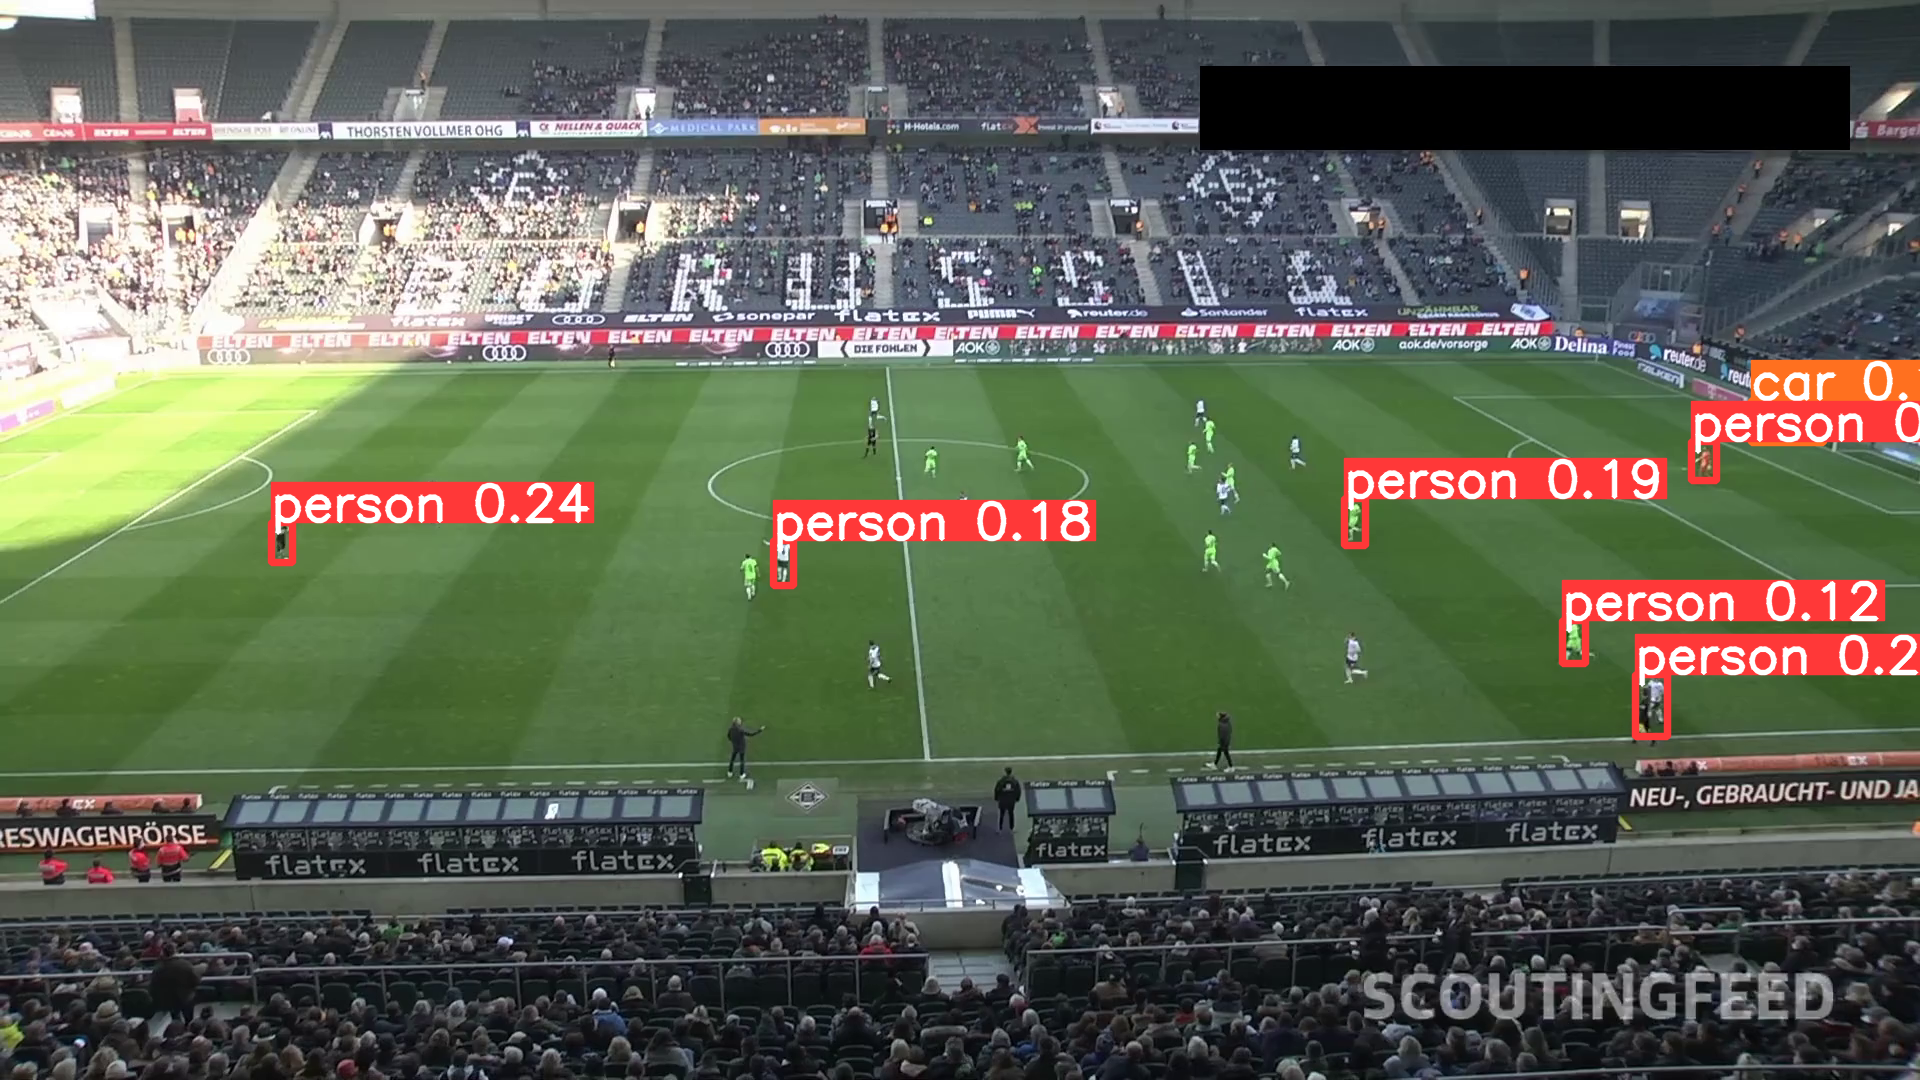

error: ignored

In [73]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the video file
video_path = "clips/08fd33_0.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

       #  Display the annotated frame
        from google.colab.patches import cv2_imshow
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()